In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import math

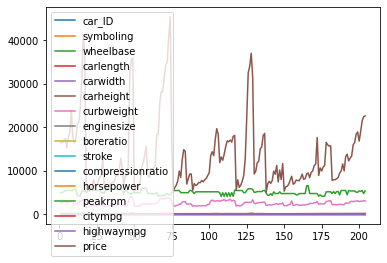

In [5]:
dataFrame = pd.read_csv("cp.csv")

dataFrame = dataFrame.dropna()

pd.DataFrame(dataFrame).plot()







In [6]:
np.var(dataFrame.price.to_numpy())

64288301.60203818

In [7]:
np.mean(dataFrame.price.to_numpy())

13341.336651741292

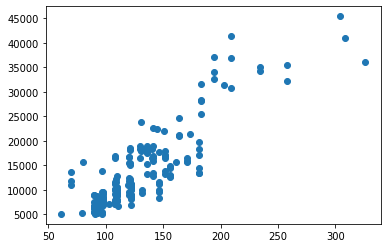

In [ ]:
dataFrame = dataFrame[['enginesize','price']]

model=make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000))


x_train,x_test,y_train,y_test = train_test_split(dataFrame[['enginesize']],dataFrame.price,train_size=0.8,shuffle=True)

model.fit(x_train,y_train)

predicts = model.predict(x_test)

plt.scatter(dataFrame.enginesize,dataFrame.price)

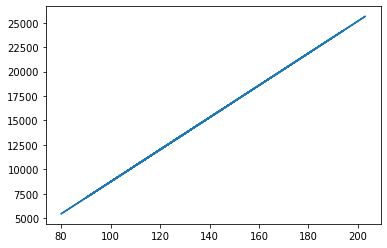

In [ ]:
plt.plot(x_test,predicts)

In [ ]:
model.score(x_test,y_test)

0.6382605871026072

In [ ]:
predicts_list = predicts.tolist()
x_test_list = x_test.enginesize.to_list()
def getLineEquation():
  predict0 = predicts_list[0]
  predict1 = 0
  x_test0 = x_test_list[0]
  x_test1 = 0
  for predict in predicts_list:
    if (predict != predict0):
      predict1 = predict
      break

  for xtest in x_test_list:
    if (xtest != x_test0):
      x_test1 = xtest
      break
  a = (predict0-predict1)/(x_test0-x_test1)
  b = ((x_test0*predict1)-(predict0*x_test1))/(x_test0-x_test1)
  
  return (a,b)

def predictPrice(engineSize):
  a,b = getLineEquation()
  return (a*engineSize) + b

predictPrice(180)


21875.265531402547